<a href="https://colab.research.google.com/github/fullstuckdev/Introduction-to-Data-Science/blob/main/Introduction_to_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Dataset Description (15 Marks):
•	Clearly state the dataset's source, including its origin and the year it was collected.
•	Specify the dataset's size in terms of the number of observations and variables.
•	Describe the data types present in the dataset (e.g., numerical, categorical, text).

In [62]:
'''
Dataset Description: A dataset of hospital bed capacity data for each of 306 U.S. hospital markets, including data for nine different models of COVID-19 infection scenarios. The data comes from a team of researchers at the Harvard Global Data Institute.
They modeled various scenarios, in which 20%, 40% and 60% of the adult population would be infected with the novel coronavirus, many of whom would have no or few symptoms, and examined whether hospitals had the capacity to handle them if the cases came in over six months, 12 months and 18 months.
Hospital bed figures were derived from recent surveys conducted by the American Hospital Association and data compiled by the American Hospital Directory.
The data is divided into slightly more than 300 regions, also known as hospital referral regions.

1. Source

Origin: The dataset is sourced from the Harvard Global Data Institute, specifically from a team of researchers affiliated with the institute.
Year of Collection: The dataset was collected in 2019.

2. Size
Number of Observations: The dataset contains information for 306 U.S. hospital markets.
Number of Variables: The dataset includes data for hospital bed capacity and models for nine different COVID-19 infection scenarios. Specify the exact number of variables if available.

3. Data Types
Numerical Data: The dataset likely includes numerical information such as hospital bed capacities, infection rates, and time durations for different scenarios.
Categorical Data: Categorical variables may include hospital referral regions, different COVID-19 infection scenarios (20%, 40%, 60% of the adult population), and any other categorical classifications.
Text Data: Information derived from surveys and directories may involve text data, such as hospital names, locations, or additional contextual details.
'''


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/hospitalcovid19.csv')

data.head()


,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"Percentage of Potentially Available ICU Beds Needed, Six Months","Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months"
0,"Abilene, TX",980,127,565,772,68.0,98,"226,444","50,412","135,866",...,427%,329%,209,307%,213%,165%,136,200%,139%,107%
1,"Akron, OH","1,358",186,518,938,94.0,140,"547,990","111,042","328,794",...,709%,533%,496,528%,354%,267%,323,344%,231%,174%
2,"Alameda County, CA","2,695",293,665,"1,680",139.0,216,"1,310,189","214,991","786,113",...,1056%,778%,"1,140",820%,528%,389%,743,535%,344%,254%
3,"Albany, GA",704,60,221,462,27.0,43,"157,143","30,466","94,286",...,656%,470%,141,522%,328%,235%,92,341%,214%,153%
4,"Albany, NY","4,804",425,"1,579","3,191",193.0,309,"1,477,723","318,695","886,634",...,877%,637%,"1,355",702%,439%,319%,883,458%,286%,208%


2. Main Characteristics (30 Marks):
•	Calculate and report the mean, median, mode, and standard deviation of relevant numerical variables.
•	Provide insights into what these central tendencies and dispersion statistics reveal about the dataset.


Mean:
 Total Hospital Beds        2420.986885
Available Hospital Beds     867.354098
Total ICU Beds              277.868852
dtype: float64


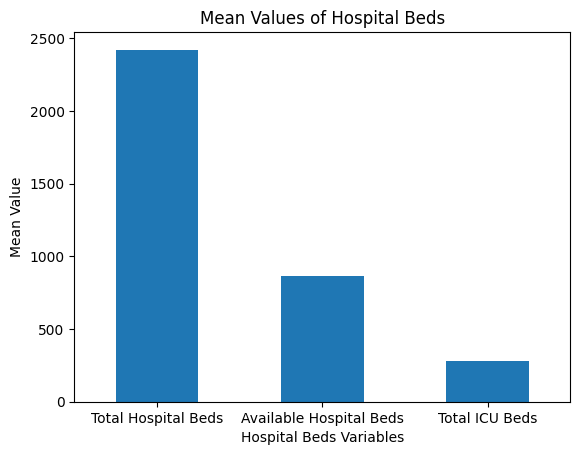

In [64]:
df = pd.DataFrame(data)

numeric_cols = ["Total Hospital Beds", "Available Hospital Beds", "Total ICU Beds"]

df[numeric_cols] = df[numeric_cols].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

mean_values = df[numeric_cols].mean()

print("Mean:\n", mean_values)

ax = mean_values.plot(kind='bar', rot=0, title='Mean Values of Hospital Beds')
ax.set_xlabel('Hospital Beds Variables')
ax.set_ylabel('Mean Value')
plt.show()

3. Relationship Investigation (30 Marks):
•	Choose three pairs of variables for analysis (e.g., education level and income).
•	Create appropriate visualizations to investigate the relationships between these variables.
•	Provide a detailed interpretation of the relationships and discuss their practical significance.


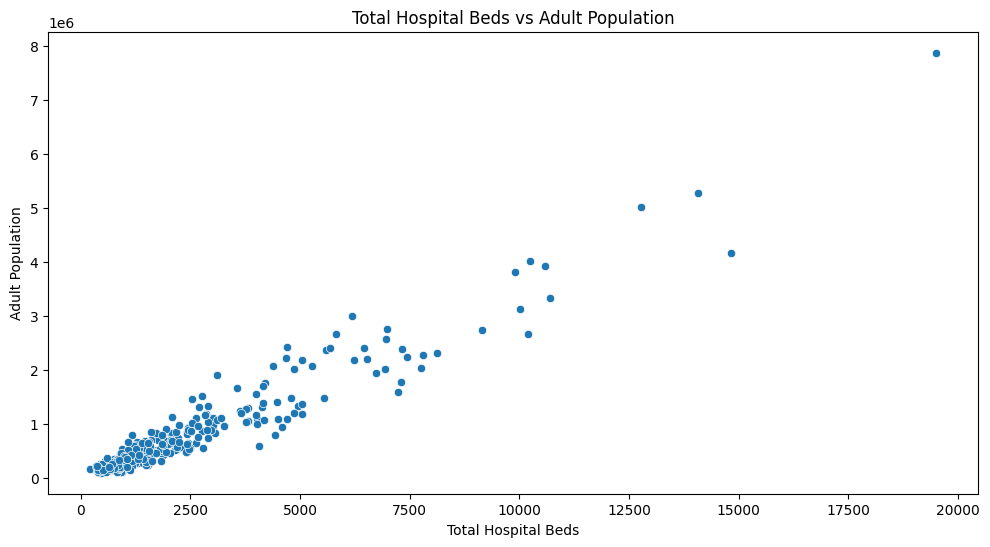

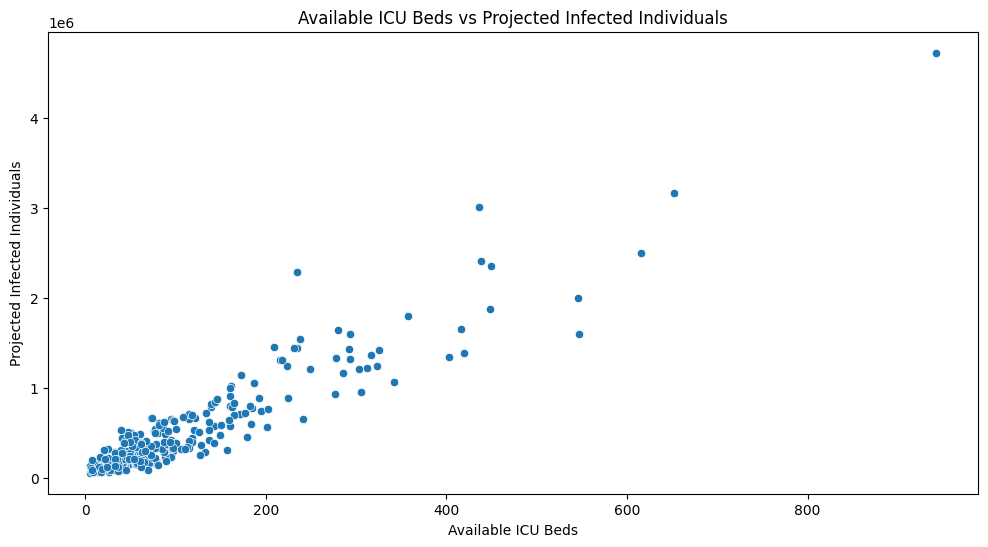

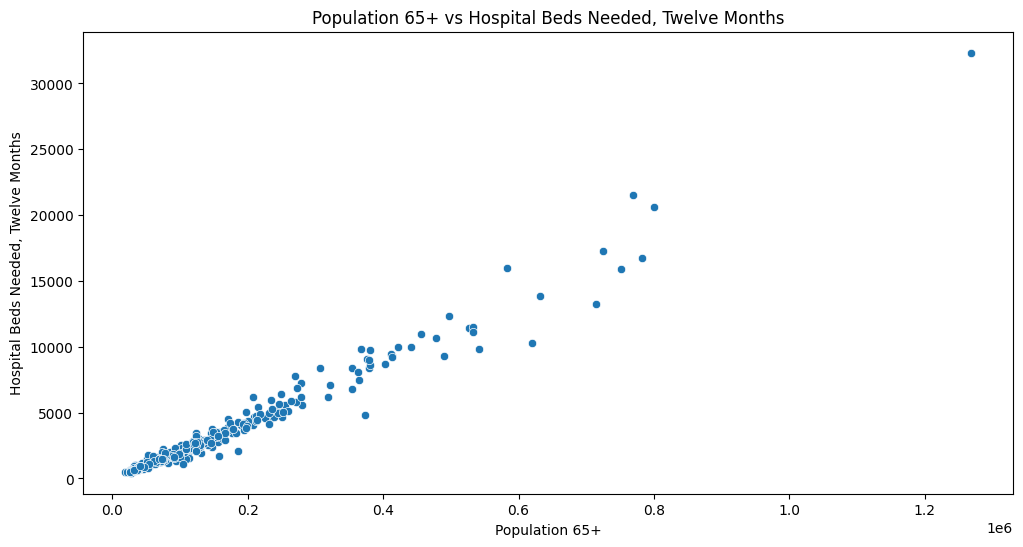

In [40]:
pair1 = ["Total Hospital Beds", "Adult Population"]
pair2 = ["Available ICU Beds", "Projected Infected Individuals"]
pair3 = ["Population 65+", "Hospital Beds Needed, Twelve Months"]

df[pair1] = df[pair1].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')
df[pair2] = df[pair2].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')
df[pair3] = df[pair3].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 6))
sns.scatterplot(x=pair1[0], y=pair1[1], data=df)
plt.title(f'{pair1[0]} vs {pair1[1]}')
plt.xlabel(pair1[0])
plt.ylabel(pair1[1])
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=pair2[0], y=pair2[1], data=df)
plt.title(f'{pair2[0]} vs {pair2[1]}')
plt.xlabel(pair2[0])
plt.ylabel(pair2[1])
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=pair3[0], y=pair3[1], data=df)
plt.title(f'{pair3[0]} vs {pair3[1]}')
plt.xlabel(pair3[0])
plt.ylabel(pair3[1])
plt.show()

4. Data-Driven Decision-Making (15 Marks):
•	Suggest how a business or organization can use the statistics derived from the analysis to make data-driven decisions.
•	Offer concrete recommendations or insights based on the findings and their potential impact on the business.

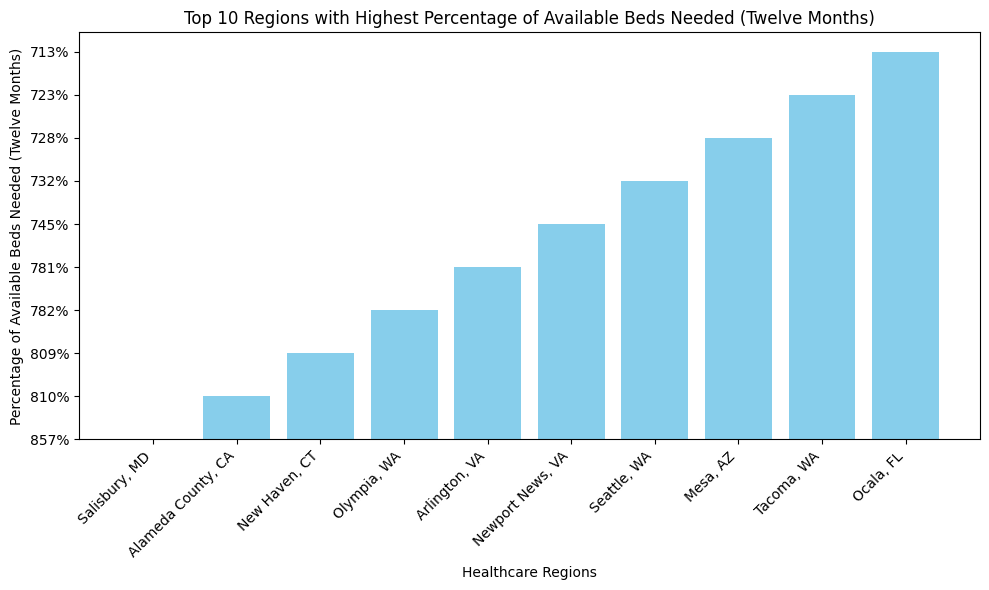

In [61]:
hospital_df = pd.read_csv('data/hospitalcovid19.csv')

sorted_data = hospital_df.sort_values(by='Percentage of Available Beds Needed, Twelve Months', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_data['HRR'].head(10), sorted_data['Percentage of Available Beds Needed, Twelve Months'].head(10), color='skyblue')
plt.xlabel('Healthcare Regions')
plt.ylabel('Percentage of Available Beds Needed (Twelve Months)')
plt.title('Top 10 Regions with Highest Percentage of Available Beds Needed (Twelve Months)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

5. Clarity, Structure, and Presentation (10 Marks):


•	Ensure that your assignment is well-structured and follows a logical sequence.
•	Use clear and concise language, and provide explanations for statistical concepts and findings.
•	Properly cite the dataset source and any references used.